In [12]:
import matplotlib.pyplot as plt
import numpy as np


def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows= int(np.ceil(n/10))
  cols = n if rows< 2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize = (cols*ratio, rows*ratio), squeeze= False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j <n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

In [13]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [14]:
fruits_2d = fruits.reshape(-1,10000)
fruits_2d.shape

(300, 10000)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50 ) # 만개를 50개로 축소
pca.fit(fruits_2d)

PCA(n_components=50)

In [16]:
pca.components_.shape  # 주성분 50 개 만개를 기반으로

(50, 10000)

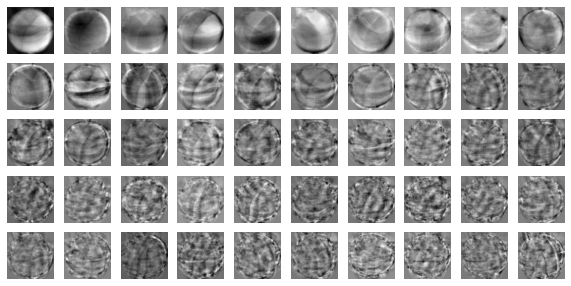

In [17]:
draw_fruits(pca.components_.reshape(-1,100,100)) # 어떤식으로 주성분을 찾았는지 그림
# 만개를 100,100 으로 그리기
# 사진 데이터 300장 에서 50개의 주성분
# 1등 부터 50등 까지
# 10개정도만 찾아도 잘 찾음.

In [20]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # 300개의 만개의 픽셀을 50개의 픽셀로(주성분)

(300, 50)

In [23]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

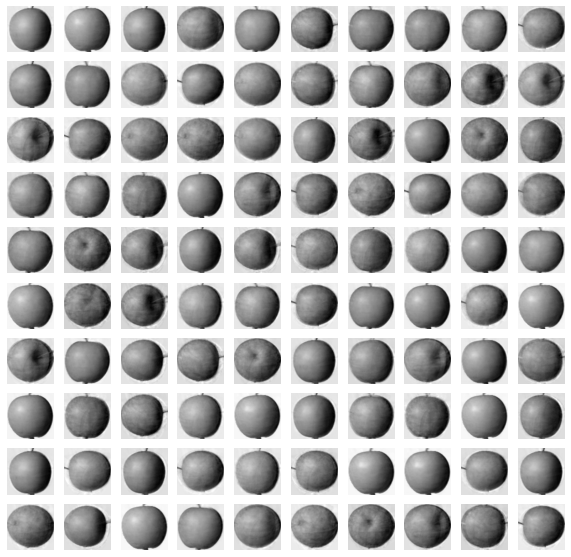

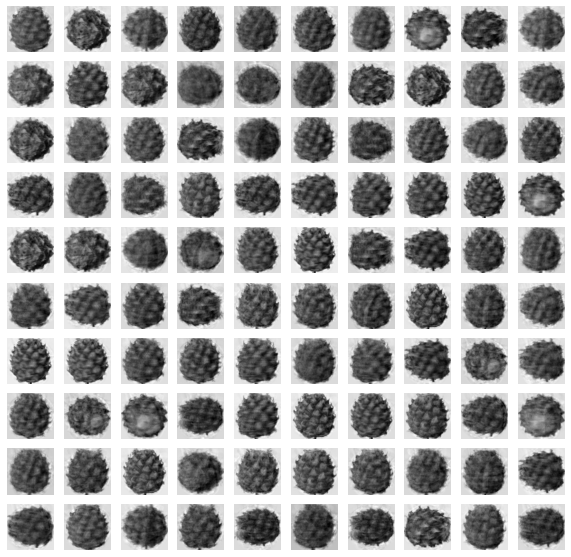

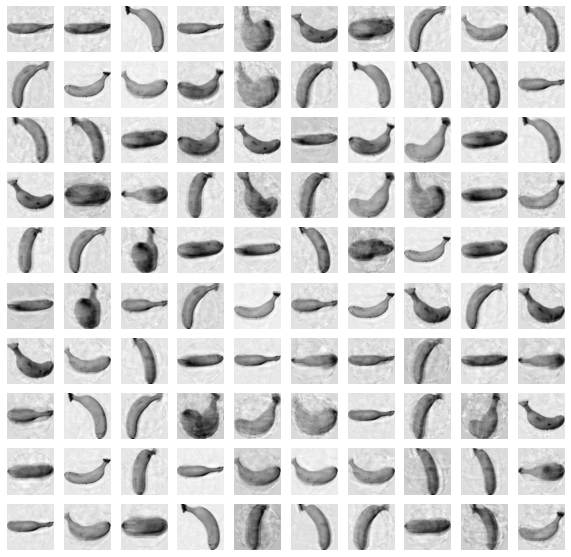

In [24]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

for i in[0,100,200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print('\n')

In [ ]:
# 화질 어느정도 깨졌지만 잘 표현했음 50 -> 10000 = 주성분을 굉장히 잘 잡았다.
# 주성분 분석하여 차원 축소하면 더 효과 좋다.